In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'arial'

In [2]:
# with open('./../data/count_matrix.csv', 'r') as f:
#     lines = f.readlines()
# entrez_ids = {line.split(',')[0]:line.split(',')[2] for line in lines[1:]}

with open('./../data/QuickGO-annotations-TFs.tsv', 'r') as f:
    lines = f.readlines()
tfs = [line.split('\t')[2] for line in lines[1:]]

with open('./../data/grn_expression.txt', 'r') as f:
    lines = f.readlines()
genes = [line.split('\t')[0] for line in lines[1:]]

grntfs = list(set(tfs)&set(genes))

In [13]:
treatments = ['Anp', 'AMn', 'AMp', 'AMnp']
colors = {'Anp':'#0088ff', 'AMn':'#ff6f00', 'AMp':'#00e883', 'AMnp':'#ffbf00'}

def rank_for_plot(df, y='betweenness_centrality', rank=5):
    lst = []
    df['plotnodes'] = np.array(round(df['nodes']/50)*50, dtype=int)
    df = df[df['plotnodes']>0]
    df = df.sort_values(by=[y], ascending=False)
    for _, b in df.groupby(['nodes', 'run'], as_index=False):
        lst.append(b[:rank])
    drank = pd.concat(lst)
    return df, drank

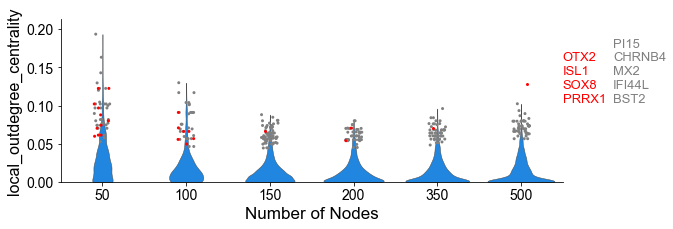

In [18]:
# ax_y = 'betweenness_centrality'
# ax_y = 'local_betweenness_centrality'
# ax_y = 'outdegree_centrality'
ax_y = 'local_outdegree_centrality'
dfviolin, dfdot = rank_for_plot(pd.read_csv(f'./../results/centrality_{treatments[0]}.txt', sep='\t'), 
                                y=ax_y, rank=5)
                                
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[0]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:5].index
ax.text(1, 0.5, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:5].index
ax.text(1.1, 0.5, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)


plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel(ax_y, fontsize=16)
plt.ylim(bottom=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

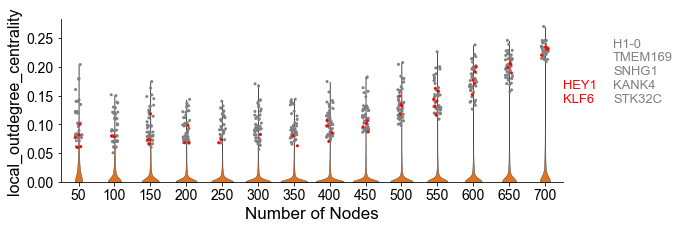

In [19]:
# ax_y = 'betweenness_centrality'
dfviolin, dfdot = rank_for_plot(pd.read_csv(f'./../results/centrality_{treatments[1]}.txt', sep='\t'), 
                                y=ax_y, rank=5)
                                
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[1]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:5].index
ax.text(1, 0.5, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:5].index
ax.text(1.1, 0.5, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel(ax_y, fontsize=16)
plt.ylim(bottom=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

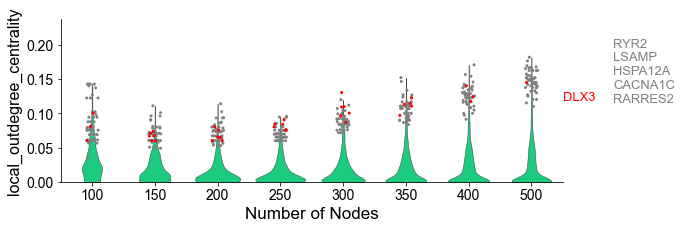

In [20]:
# ax_y = 'betweenness_centrality'
dfviolin, dfdot = rank_for_plot(pd.read_csv(f'./../results/centrality_{treatments[2]}.txt', sep='\t'), 
                                y=ax_y, rank=5)
                                
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[2]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:5].index
ax.text(1, 0.5, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:5].index
ax.text(1.1, 0.5, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel(ax_y, fontsize=16)
plt.ylim(bottom=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

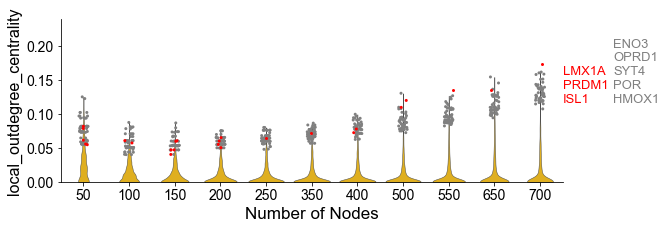

In [21]:
# ax_y = 'betweenness_centrality'
dfviolin, dfdot = rank_for_plot(pd.read_csv(f'./../results/centrality_{treatments[3]}.txt', sep='\t'), 
                                y=ax_y, rank=5)
                                
fig, ax = plt.subplots(figsize=(9, 3))
ax = sns.violinplot(x='plotnodes', y=ax_y, data = dfviolin, color=colors[treatments[3]], 
                    inner = None, linewidth=0.5, cut=0)
ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[~dfdot['geneid'].isin(grntfs)], color='grey', size=3)
tfr = dfdot[dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:5].index
ax.text(1, 0.5, '\n'.join(tfr), wrap=True, fontsize=13, color='red', transform=ax.transAxes)

ax = sns.stripplot(x='plotnodes', y=ax_y, data = dfdot[dfdot['geneid'].isin(grntfs)], color='red', size=3)
ntfr = dfdot[~dfdot['geneid'].isin(grntfs)].groupby('geneid').count().sort_values(by='run', ascending=False)[:5].index
ax.text(1.1, 0.5, '\n'.join(ntfr), wrap=True, fontsize=13, color='grey', transform=ax.transAxes)

plt.xlabel('Number of Nodes', fontsize=17)
plt.ylabel(ax_y, fontsize=16)
plt.ylim(bottom=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')